# 発電量の拠点比較用描画プログラム

ライブラリ読み込み

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import math
from numpy import linalg as LA
import cartopy.feature as cfeature
from PIL import Image
import matplotlib.patches as patches


データファイル読み取り

拠点変更による発電量が記入されたデータ

In [4]:
base_data = pl.read_csv('output_Folder/jasnaoe_storage_and_base/70GWh_result_2017-2022_baseposition_40%_monohull.csv',encoding="shift-jis")

## 各拠点の発電量を可視化する

年ごとの出力

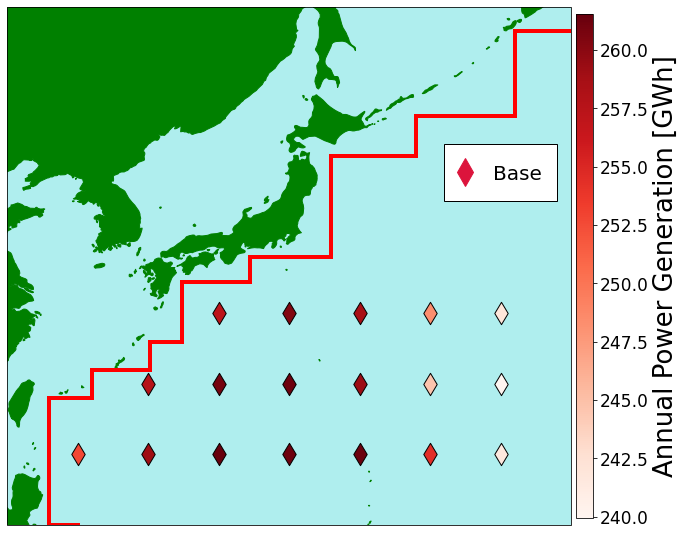

In [21]:
fig = plt.figure(figsize=(12,16)) # プロット領域の作成（matplotlib）
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # サブプロット作成時にcartopy呼び出し
year = 2018

ax.set_facecolor('paleturquoise')
land_h = cfeature.NaturalEarthFeature('physical', 'land', '50m')
ax.add_feature(land_h,color='g')
ax.set_extent([120, 160, 15, 50], ccrs.Geodetic())

lists = base_data[:][str(year)+"[GWh]"]
sizes = []
for base_i in range(len(lists)):
    sizes.append(lists[base_i])

q_min = np.min(sizes)  # 最小値
q_max = np.max(sizes)  # 最大値

for base_i in range(len(base_data)):
    #拠点&待機位置
    base_lat = base_data[base_i,"BASE LAT"]
    base_lon = base_data[base_i,"BASE LON"]
    size = base_data[base_i,str(year)+"[GWh]"]

    bases = ax.scatter(base_lon,base_lat,250,vmin=q_min ,vmax=q_max , edgecolor='black',c = size,cmap = 'Reds',marker="d")

cbar = fig.colorbar(bases, ax=ax,aspect = 30, shrink=0.58, pad = 0.008)
cbar.set_label('Annual Power Generation [GWh]',size=25) # カラーバー
cbar.ax.tick_params(labelsize=17)


#不可侵境界の設定
nonaggression_line_lat = [0,13,13,15,15,24,24,26,26,28,28,32.2,32.2,34,34,41.2,41.2,44,44,50,50]
nonaggression_line_lon = [127.5,127.5,125,125,123,123,126,126,130.1,130.1,132.4,132.4,137.2,137.2,143,143,149,149,156,156,180]

for i in range(len(nonaggression_line_lat)-1):
    ax.plot([nonaggression_line_lon[i],nonaggression_line_lon[i+1]],[nonaggression_line_lat[i],nonaggression_line_lat[i+1]],'red',linewidth=4)

#拠点と台風の凡例表示
r = patches.Rectangle(xy=(151, 38), width=8, height=4, ec='k', fc='w',zorder=3)
ax.add_patch(r)

ax.plot(152.5,40,'crimson',markersize=20,marker="d",zorder=4)
ax.text(154.5,39.5, "Base", size=20, color="black",zorder=4)

plt.savefig("base_change_ver4/draw_" + str(year) + ".png")
plt.close(fig)

im = Image.open("base_change_ver4/draw_" + str(year) + ".png")

im_crop = im.crop((110, 320, 780, 830))
im_crop.save("base_change_ver4/draw_" + str(year) + ".png", quality=100)
 


年平均での出力

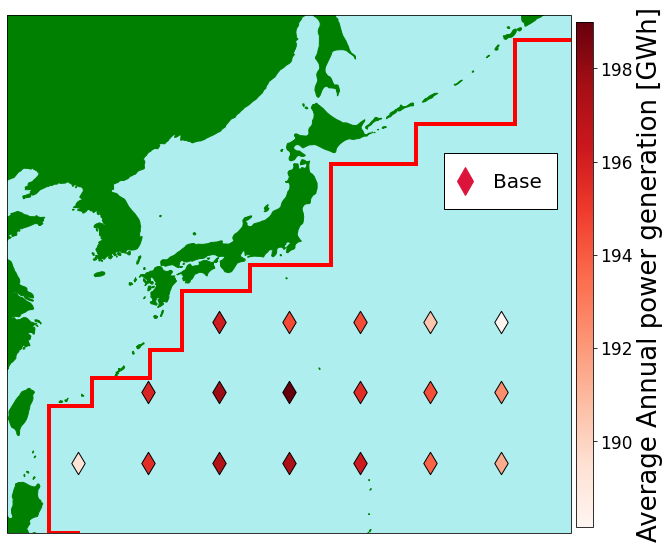

In [ ]:
fig = plt.figure(figsize=(12,16)) # プロット領域の作成（matplotlib）
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # サブプロット作成時にcartopy呼び出し


ax.set_facecolor('paleturquoise')
land_h = cfeature.NaturalEarthFeature('physical', 'land', '50m')
ax.add_feature(land_h,color='g')
ax.set_extent([120, 160, 15, 50], ccrs.Geodetic())


sizes = []
for base_i in range(len(base_data)):
    gene_sum = 0

    for year_i in range(6):
        year = 2017 + year_i
        gene_sum = gene_sum + base_data[base_i,str(year)+"[GWh]"]

    sizes.append(gene_sum/6)

q_min = np.min(sizes)  # 最小値
q_max = np.max(sizes)  # 最大値

for base_i in range(len(base_data)):
    #拠点&待機位置
    base_lat = base_data[base_i,"BASE LAT"]
    base_lon = base_data[base_i,"BASE LON"]
    size = sizes[base_i]

    bases = ax.scatter(base_lon,base_lat,250,vmin=q_min ,vmax=q_max , edgecolor='black',c = size,cmap = 'Reds',marker="d")

cbar = fig.colorbar(bases, ax=ax,aspect = 30, shrink=0.58, pad = 0.008)
cbar.set_label('Average Annual power generation [GWh]',size=26) # カラーバー
cbar.ax.tick_params(labelsize=17)

#不可侵境界の設定
nonaggression_line_lat = [0,13,13,15,15,24,24,26,26,28,28,32.2,32.2,34,34,41.2,41.2,44,44,50,50]
nonaggression_line_lon = [127.5,127.5,125,125,123,123,126,126,130.1,130.1,132.4,132.4,137.2,137.2,143,143,149,149,156,156,180]

for i in range(len(nonaggression_line_lat)-1):
    ax.plot([nonaggression_line_lon[i],nonaggression_line_lon[i+1]],[nonaggression_line_lat[i],nonaggression_line_lat[i+1]],'red',linewidth=4)

#拠点と台風の凡例表示
r = patches.Rectangle(xy=(151, 38), width=8, height=4, ec='k', fc='w',zorder=3)
ax.add_patch(r)

ax.plot(152.5,40,'crimson',markersize=20,marker="d",zorder=4)
ax.text(154.5,39.5, "Base", size=20, color="black",zorder=4)

plt.savefig("base_change_ver4/draw_" + str(year) + ".png")
plt.close(fig)

im = Image.open("base_change_ver4/draw_" + str(year) + ".png")

im_crop = im.crop((110, 320, 770, 830))
im_crop.save("jasnaoe_storage_and_base/draw_sum_40%.png", quality=100)
 


蓄電容量ごとの運用年合計発電量の描画

In [ ]:
for storage_n in range(10):
    storage = 10 + storage_n * 10
    base_data = pl.read_csv("storage_and_base/" + str(storage) + "GWh_2018-2022_baseposition.csv",encoding="shift-jis")

    fig = plt.figure(figsize=(12,16)) # プロット領域の作成（matplotlib）
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # サブプロット作成時にcartopy呼び出し


    ax.set_facecolor('paleturquoise')
    land_h = cfeature.NaturalEarthFeature('physical', 'land', '50m')
    ax.add_feature(land_h,color='g')
    ax.set_extent([120, 160, 15, 50], ccrs.Geodetic())


    sizes = []
    for base_i in range(len(base_data)):
        gene_sum = 0

        for year_i in range(6):
            year = 2017 + year_i
            gene_sum = gene_sum + base_data[base_i,str(year)+"[GWh]"]

        sizes.append(gene_sum)

    q_min = np.min(sizes)  # 最小値
    q_max = np.max(sizes)  # 最大値

    for base_i in range(len(base_data)):
        #拠点&待機位置
        base_lat = base_data[base_i,"BASE LAT"]
        base_lon = base_data[base_i,"BASE LON"]
        size = sizes[base_i]

        bases = ax.scatter(base_lon,base_lat,250,vmin=q_min ,vmax=q_max , edgecolor='black',c = size,cmap = 'Reds',marker="d")

    cbar = fig.colorbar(bases, ax=ax,aspect = 30, shrink=0.58, pad = 0.008)
    cbar.set_label('Annual Power Generation [GWh]',size=26) # カラーバー
    cbar.ax.tick_params(labelsize=17)

    #不可侵境界の設定
    nonaggression_line_lat = [0,13,13,15,15,24,24,26,26,28,28,32.2,32.2,34,34,41.2,41.2,44,44,50,50]
    nonaggression_line_lon = [127.5,127.5,125,125,123,123,126,126,130.1,130.1,132.4,132.4,137.2,137.2,143,143,149,149,156,156,180]

    for i in range(len(nonaggression_line_lat)-1):
        ax.plot([nonaggression_line_lon[i],nonaggression_line_lon[i+1]],[nonaggression_line_lat[i],nonaggression_line_lat[i+1]],'red',linewidth=4)

    #拠点と台風の凡例表示
    r = patches.Rectangle(xy=(151, 38), width=8, height=4, ec='k', fc='w',zorder=3)
    ax.add_patch(r)

    ax.plot(152.5,40,'crimson',markersize=20,marker="d",zorder=4)
    ax.text(154.5,39.5, "Base", size=20, color="black",zorder=4)

    plt.savefig("base_change_ver4/draw_" + str(year) + ".png")
    plt.close(fig)
    
    im = Image.open("base_change_ver4/draw_" + str(year) + ".png")

    im_crop = im.crop((110, 320, 770, 830))
    im_crop.save("storage_and_base/draw_sum" + str(storage) + ".png", quality=100)
 


蓄電容量ごとの運用年合計発電量の描画（すべてのケースで発電量の軸固定）

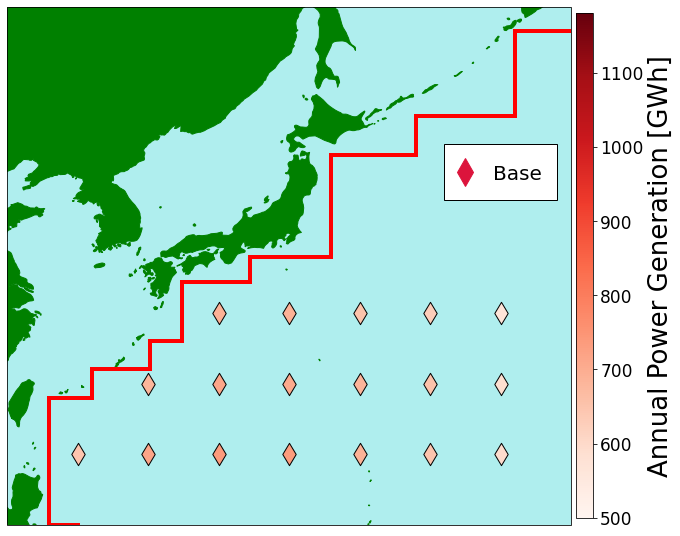

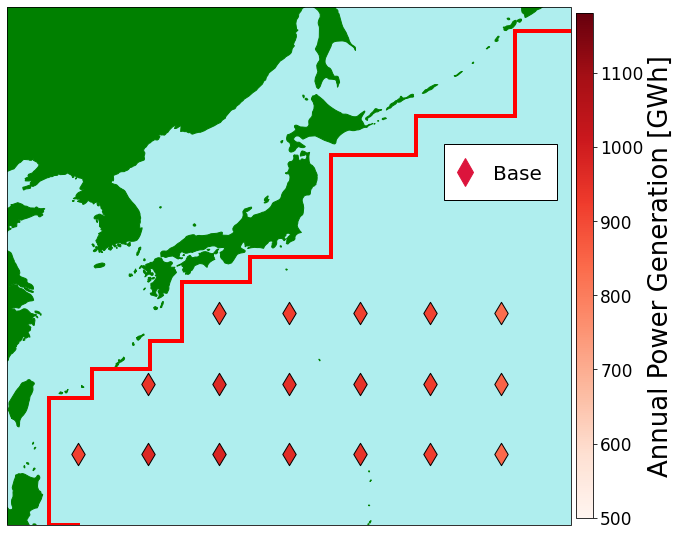

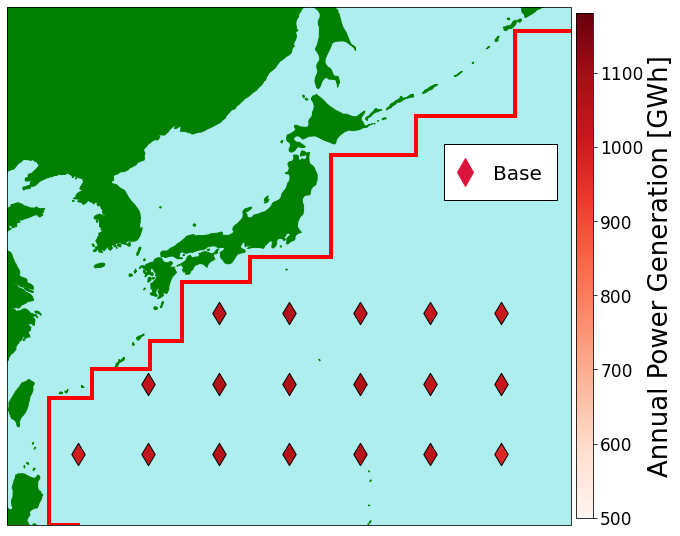

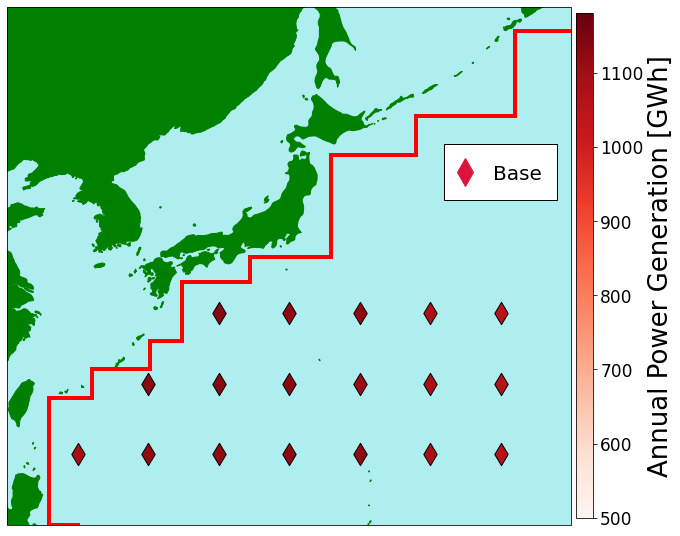

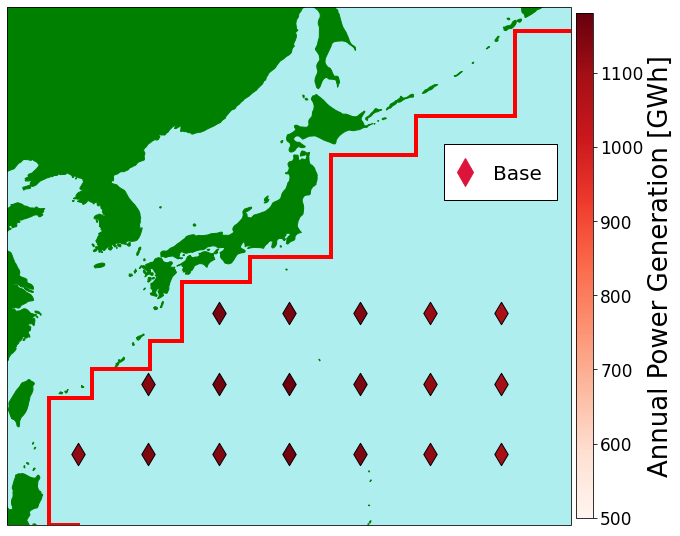

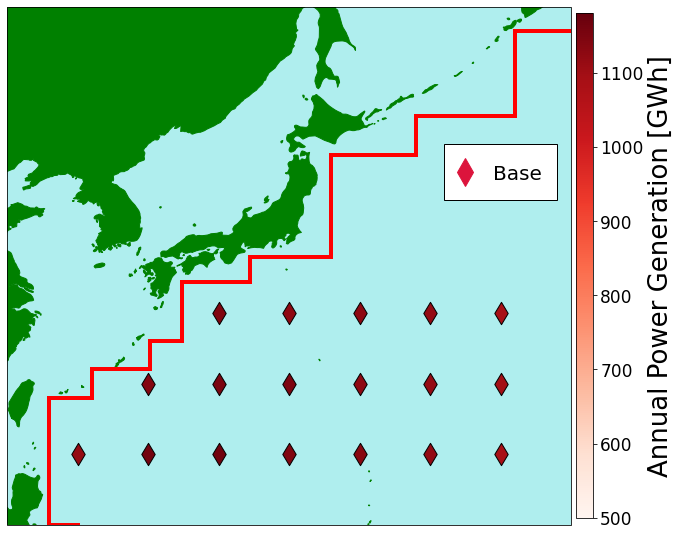

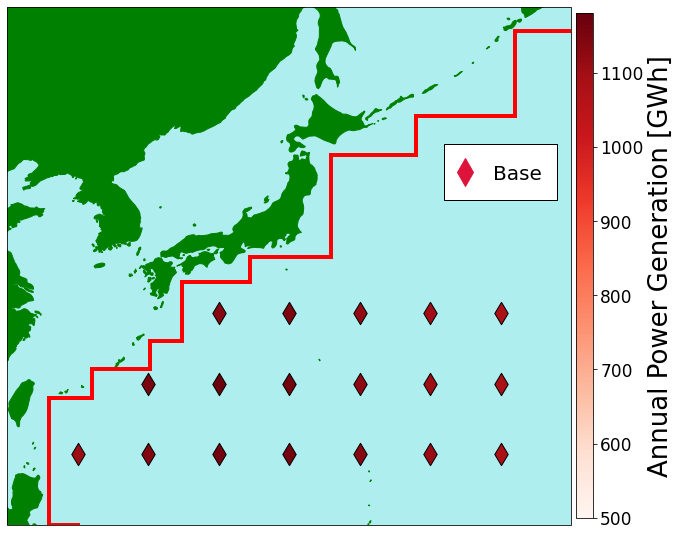

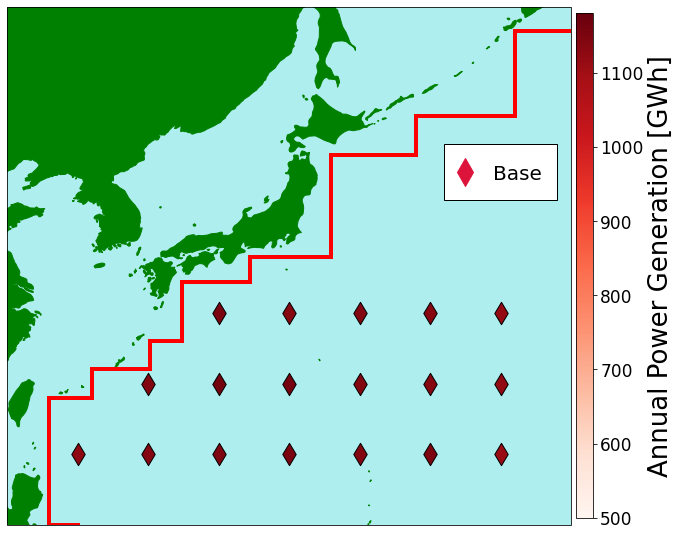

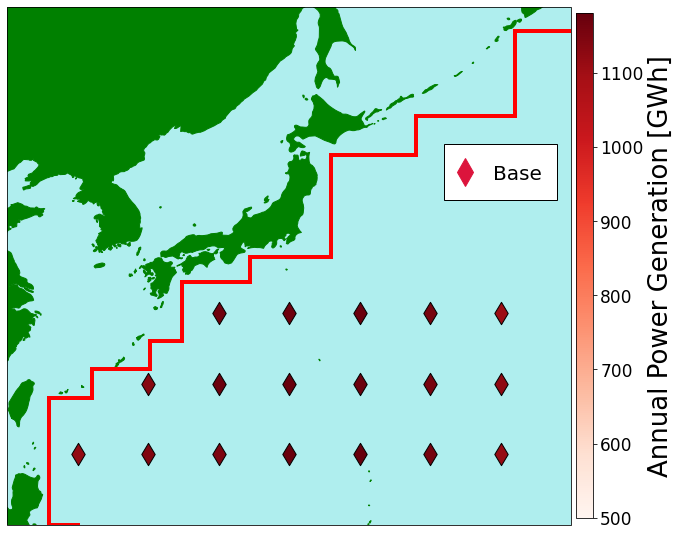

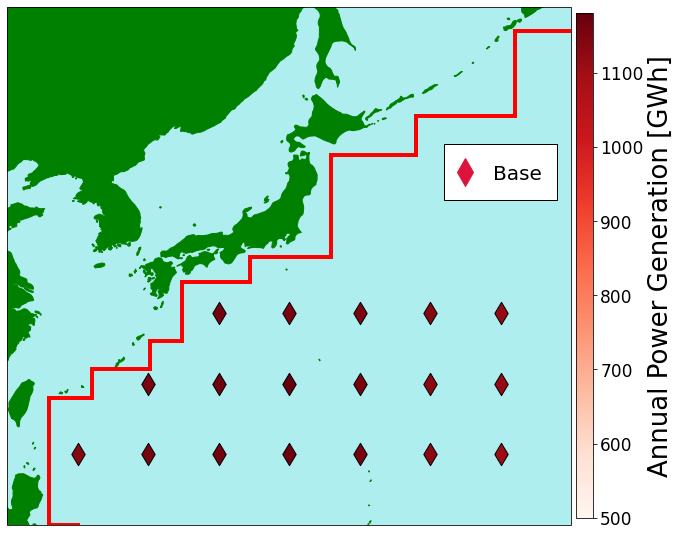

In [5]:
for storage_n in range(10):
    storage = 10 + storage_n * 10
    base_data = pl.read_csv("storage_and_base/" + str(storage) + "GWh_2018-2022_baseposition.csv",encoding="shift-jis")

    fig = plt.figure(figsize=(12,16)) # プロット領域の作成（matplotlib）
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # サブプロット作成時にcartopy呼び出し


    ax.set_facecolor('paleturquoise')
    land_h = cfeature.NaturalEarthFeature('physical', 'land', '50m')
    ax.add_feature(land_h,color='g')
    ax.set_extent([120, 160, 15, 50], ccrs.Geodetic())


    sizes = []
    for base_i in range(len(base_data)):
        gene_sum = 0

        for year_i in range(6):
            year = 2017 + year_i
            gene_sum = gene_sum + base_data[base_i,str(year)+"[GWh]"]

        sizes.append(gene_sum)

    q_min = 500  # 最小値
    q_max = 1180  # 最大値

    for base_i in range(len(base_data)):
        #拠点&待機位置
        base_lat = base_data[base_i,"BASE LAT"]
        base_lon = base_data[base_i,"BASE LON"]
        size = sizes[base_i]

        bases = ax.scatter(base_lon,base_lat,250,vmin=q_min ,vmax=q_max , edgecolor='black',c = size,cmap = 'Reds',marker="d")

    cbar = fig.colorbar(bases, ax=ax,aspect = 30, shrink=0.58, pad = 0.008)
    cbar.set_label('Annual Power Generation [GWh]',size=26) # カラーバー
    cbar.ax.tick_params(labelsize=17)

    #不可侵境界の設定
    nonaggression_line_lat = [0,13,13,15,15,24,24,26,26,28,28,32.2,32.2,34,34,41.2,41.2,44,44,50,50]
    nonaggression_line_lon = [127.5,127.5,125,125,123,123,126,126,130.1,130.1,132.4,132.4,137.2,137.2,143,143,149,149,156,156,180]

    for i in range(len(nonaggression_line_lat)-1):
        ax.plot([nonaggression_line_lon[i],nonaggression_line_lon[i+1]],[nonaggression_line_lat[i],nonaggression_line_lat[i+1]],'red',linewidth=4)

    #拠点と台風の凡例表示
    r = patches.Rectangle(xy=(151, 38), width=8, height=4, ec='k', fc='w',zorder=3)
    ax.add_patch(r)

    ax.plot(152.5,40,'crimson',markersize=20,marker="d",zorder=4)
    ax.text(154.5,39.5, "Base", size=20, color="black",zorder=4)

    plt.savefig("base_change_ver4/draw_" + str(year) + ".png")
    plt.close(fig)

    im = Image.open("base_change_ver4/draw_" + str(year) + ".png")

    im_crop = im.crop((110, 320, 770, 830))
    im_crop.save("basedrawpic/draw_sum" + str(storage) + ".png", quality=100)
 


6年分の一括出力

In [ ]:
for year_i in range(6):
    year = 2017 + year_i
    fig = plt.figure(figsize=(12,16)) # プロット領域の作成（matplotlib）
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # サブプロット作成時にcartopy呼び出し


    ax.set_facecolor('paleturquoise')
    land_h = cfeature.NaturalEarthFeature('physical', 'land', '50m')
    ax.add_feature(land_h,color='g')
    ax.set_extent([120, 160, 15, 50], ccrs.Geodetic())

    lists = base_data[:][str(year)+"[GWh]"]
    sizes = []
    for base_i in range(len(lists)):
        sizes.append(lists[base_i])

    #q_min = 125  # 最小値
    #q_max = 265  # 最大値

    for base_i in range(len(base_data)):
        #拠点&待機位置
        base_lat = base_data[base_i,"BASE LAT"]
        base_lon = base_data[base_i,"BASE LON"]
        size = base_data[base_i,str(year)+"[GWh]"]

        bases = ax.scatter(base_lon,base_lat,250,vmin=q_min ,vmax=q_max , edgecolor='black',c = size,cmap = 'Reds',marker="d")

    cbar = fig.colorbar(bases, ax=ax,aspect = 30, shrink=0.58, pad = 0.008)
    cbar.set_label('Annual Power Generation [GWh]',size=26) # カラーバー
    cbar.ax.tick_params(labelsize=17)

    #不可侵境界の設定
    nonaggression_line_lat = [0,13,13,15,15,24,24,26,26,28,28,32.2,32.2,34,34,41.2,41.2,44,44,50,50]
    nonaggression_line_lon = [127.5,127.5,125,125,123,123,126,126,130.1,130.1,132.4,132.4,137.2,137.2,143,143,149,149,156,156,180]

    for i in range(len(nonaggression_line_lat)-1):
        ax.plot([nonaggression_line_lon[i],nonaggression_line_lon[i+1]],[nonaggression_line_lat[i],nonaggression_line_lat[i+1]],'red',linewidth=4)

    #拠点と台風の凡例表示
    r = patches.Rectangle(xy=(151, 38), width=8, height=4, ec='k', fc='w',zorder=3)
    ax.add_patch(r)

    ax.plot(152.5,40,'crimson',markersize=20,marker="d",zorder=4)
    ax.text(154.5,39.5, "Base", size=20, color="black",zorder=4)

    plt.savefig("base_change_ver4/draw_" + str(year) + ".png")
    plt.close(fig)

    im = Image.open("base_change_ver4/draw_" + str(year) + ".png")

    im_crop = im.crop((110, 320, 770, 830))
    im_crop.save("base_change_ver4/draw_" + str(year) + ".png", quality=100)
    
